Importing basic functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data. I have preprocessed it from a government list of highways stops in Illinois. Generically, I pull out the number of stops (n_stops), the number of searches (n_searches), the number of times searches were successful (n_hits), and relative ratio between those terms. This subdivided with characteristics of each group examined.

First I'll pull out data for men and women of different ages.

In [2]:
gender_data = pd.read_csv('GenderPolicing.csv', index_col = [0])
gender_data.head()

,gender,age,n_stops,n_searches,n_hits,search_rate,hit_rate
16 Year Old Men,M,16,10389,367,96,0.035326,0.261580
16 Year Old Women,F,16,6129,125,49,0.020395,0.392000
17 Year Old Men,M,17,35375,1304,378,0.036862,0.289877
17 Year Old Women,F,17,20699,398,128,0.019228,0.321608
18 Year Old Men,M,18,66488,3237,941,0.048685,0.290701


Next, for different races in different Illinois Policing Districts.

In [3]:
district_race = pd.read_csv('DistrictRacePolicing.csv', index_col = [0])
district_race.head()

,race,district_number,n_stops,n_searches,n_hits,search_rate,dis_search,hit_rate,dis_hit
White in District 01,White,1,126922,2225,569,0.017530,0.021903,0.255730,0.228845
Black in District 01,Black,1,8201,467,80,0.056944,0.021903,0.171306,0.228845
Hispanic in District 01,Hispanic,1,9686,510,87,0.052653,0.021903,0.170588,0.228845
Asian in District 01,Asian,1,2712,29,4,0.010693,0.021903,0.137931,0.228845
White in District 02,White,2,165797,4737,769,0.028571,0.054328,0.162339,0.128637


And finally, both of that information combined.

In [4]:
all_data = pd.read_csv('DistrictAgeGenderRacePolicing.csv', index_col = [0])
all_data.head()

,age,race,gender,district_number,n_stops,n_searches,n_hits,search_rate,dis_search,hit_rate,dis_hit
16 to 25 Year Old White Men in District 01,20.5,White,M,1,24440,766,234,0.031342,0.021903,0.305483,0.228845
16 to 25 Year Old White Women in District 01,20.5,White,F,1,16250,213,64,0.013108,0.021903,0.300469,0.228845
16 to 25 Year Old Black Men in District 01,20.5,Black,M,1,1411,148,28,0.104890,0.021903,0.189189,0.228845
16 to 25 Year Old Black Women in District 01,20.5,Black,F,1,877,31,3,0.035348,0.021903,0.096774,0.228845
16 to 25 Year Old Hispanic Men in District 01,20.5,Hispanic,M,1,2114,193,36,0.091296,0.021903,0.186528,0.228845


Let's look at how often people are stopped by age and gender.

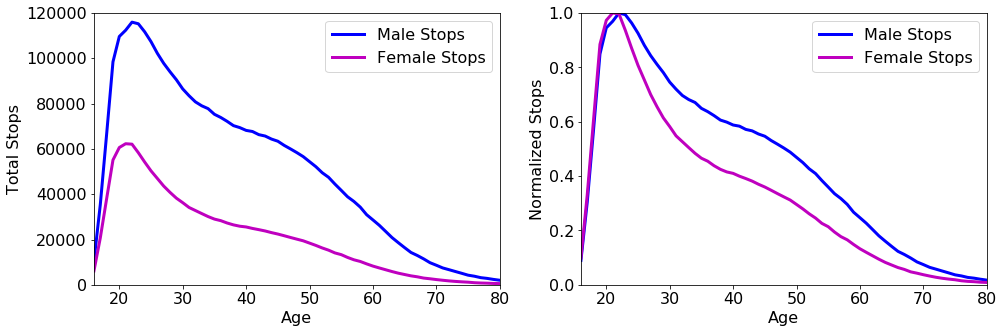

In [5]:
# sorting the data into male data and female data
male_data = gender_data.loc[gender_data['gender'] == 'M', :]
female_data = gender_data.loc[gender_data['gender'] == 'F', :]

# setting initial parameters to the plot
plt.figure(figsize = (16, 5))
plt.rcParams.update({'font.size' : 16})


# plotting total searches
plt.subplot(1,2,1)
plt.plot(male_data.age, male_data.n_stops, 'b-', label = 'Male Stops', linewidth = 3)
plt.plot(female_data.age, female_data.n_stops, 'm-', label = 'Female Stops', linewidth = 3)

# making it look nicer
plt.ylabel('Total Stops')
plt.xlabel('Age')
plt.legend()
plt.axis([16, 80, 0, 120000]);

# plotting normalized searches
plt.subplot(1,2,2)
plt.plot(male_data.age, male_data.n_stops / male_data.n_stops.max(), 'b-',label = 'Male Stops', linewidth = 3)
plt.plot(female_data.age, female_data.n_stops / female_data.n_stops.max(), 'm-', label = 'Female Stops', linewidth = 3)

# making it look nicer
plt.ylabel('Normalized Stops')
plt.xlabel('Age')
plt.legend()
plt.axis([16, 80, 0, 1]);

The most obvious trend is that many more men are stopped than women at all ages. Also, more people in their twenties are stopped which decreases with age except for a slight plateau from the ages of 30-50 which is longer for men. Now we'll examine search and hit rates.

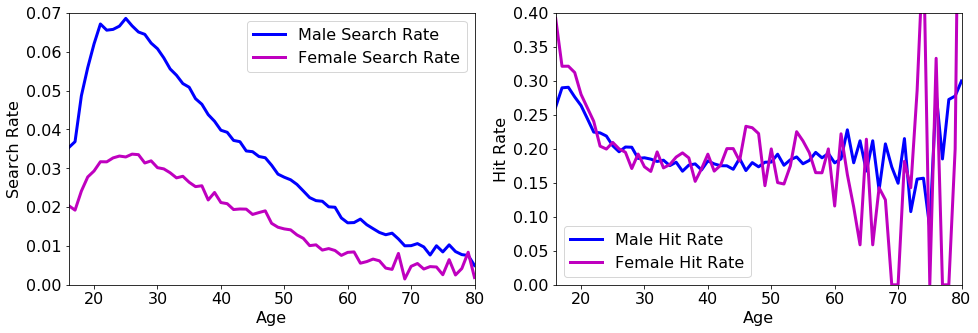

In [6]:
# setting initial parameters to the plot
plt.figure(figsize = (16, 5))
plt.rcParams.update({'font.size' : 16})

# plotting the data
plt.subplot(1,2,1)
plt.plot(male_data.age, male_data.search_rate, 'b-', label = 'Male Search Rate', linewidth = 3)
plt.plot(female_data.age, female_data.search_rate, 'm-', label = 'Female Search Rate', linewidth = 3)

# making it look nicer
plt.ylabel('Search Rate')
plt.xlabel('Age')
plt.legend()
plt.axis([16, 80, 0, .07]);

# plotting the hit rate
plt.subplot(1,2,2)
plt.plot(male_data.age, male_data.hit_rate, 'b-', label = 'Male Hit Rate', linewidth = 3)
plt.plot(female_data.age, female_data.hit_rate, 'm-', label = 'Female Hit Rate', linewidth = 3)

# making it look nicer
plt.ylabel('Hit Rate')
plt.xlabel('Age')
plt.legend()
plt.axis([16, 80, 0, .4]);

Men are searched more frequently than women, although both are similar to general stopping trends. For hit rate, younger people are hit more frequently and then it levels off at about 20%, with little dependence on gender.

Now moving onto race. We'll use the group by tool to make things a little bit easier.

In [7]:
ByRace = district_race.groupby('race')

Let's start by plotting relative search rates. The size of the points represent the square root of the number of searches in a given police district.

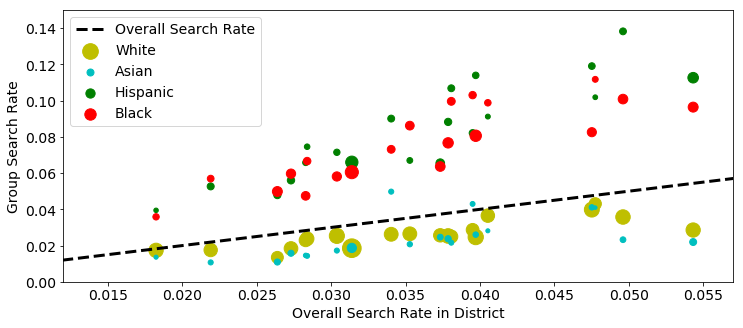

In [8]:
# initializing the plots
plt.figure(figsize = (12,5))
plt.rcParams.update({'font.size' : 14})

# plot the overall rate
plt.plot(np.linspace(0, 0.45, 10), np.linspace(0, 0.45, 10), 'k--', label = 'Overall Search Rate', linewidth = 3)

# plot the racial data
plt.scatter(x = ByRace.get_group('White').dis_search, y = ByRace.get_group('White').search_rate,
            label = 'White', c = 'y', s = 0.5 * np.sqrt(pd.to_numeric(ByRace.get_group('White').n_stops)))
plt.scatter(x = ByRace.get_group('Asian').dis_search, y = ByRace.get_group('Asian').search_rate,
            label = 'Asian', c = 'c', s = 0.5 * np.sqrt(pd.to_numeric(ByRace.get_group('Asian').n_stops)))
plt.scatter(x = ByRace.get_group('Hispanic').dis_search, y = ByRace.get_group('Hispanic').search_rate,
            label = 'Hispanic', c = 'g', s = 0.5 * np.sqrt(pd.to_numeric(ByRace.get_group('Hispanic').n_stops)))
plt.scatter(x = ByRace.get_group('Black').dis_search, y = ByRace.get_group('Black').search_rate,
            label = 'Black', c = 'r', s = 0.5 * np.sqrt(pd.to_numeric(ByRace.get_group('Black').n_stops)))
    
# make it look good
plt.legend()
plt.xlabel('Overall Search Rate in District')
plt.ylabel('Group Search Rate')
plt.axis([0.012, .057, 0, .15]);

The racial bias jumps out pretty quickly. We'll now visualize hit rate, with point sizes dependent on the square root of the number of searches.

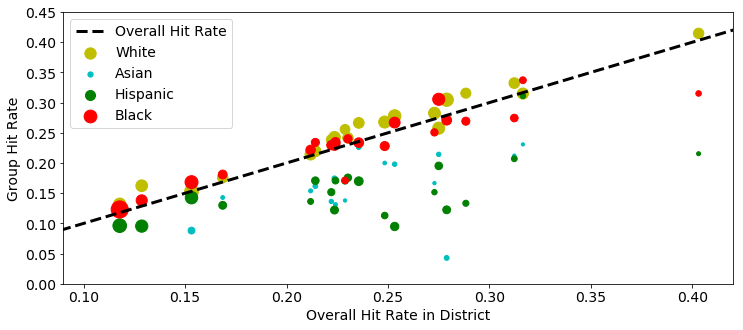

In [9]:
# initializing the figure
plt.figure(figsize = (12, 5))
plt.rcParams.update({'font.size' : 14})

# plot the overall rate
plt.plot(np.linspace(0, 0.5, 10), np.linspace(0, 0.5, 10), 'k--', label = 'Overall Hit Rate', linewidth = 3)


# plot the racial data
plt.scatter(x = ByRace.get_group('White').dis_hit, y = ByRace.get_group('White').hit_rate,
            label = 'White',c = 'y', s = 2 * np.sqrt(pd.to_numeric(ByRace.get_group('White').n_searches)))
plt.scatter(x = ByRace.get_group('Asian').dis_hit, y = ByRace.get_group('Asian').hit_rate,
            label = 'Asian', c = 'c', s = 2 * np.sqrt(pd.to_numeric(ByRace.get_group('Asian').n_searches)))
plt.scatter(x = ByRace.get_group('Hispanic').dis_hit, y = ByRace.get_group('Hispanic').hit_rate,
            label='Hispanic', c = 'g', s = 2 * np.sqrt(pd.to_numeric(ByRace.get_group('Hispanic').n_searches)))
plt.scatter(x = ByRace.get_group('Black').dis_hit, y = ByRace.get_group('Black').hit_rate,
            label = 'Black',c = 'r',s = 2 * np.sqrt(pd.to_numeric(ByRace.get_group('Black').n_searches)))

# make it look better
plt.legend()
plt.xlabel('Overall Hit Rate in District')
plt.ylabel('Group Hit Rate')
plt.axis([0.09, .42, 0, .45]);

So the four factors we've examined have a pretty strong impact on policing rates. We'll combine them to design a model of police behavior to try to back out their relative importance. To this end, we'll use a random forest regressor.

In [10]:
# importing the basic tools
from sklearn.ensemble import RandomForestRegressor

# initializing the models
fithit = RandomForestRegressor(random_state=0)
fitsearch = RandomForestRegressor(random_state=0)

We now need to create the input matrix for our model. To this end, we will convert our values to numerics.

In [11]:
# make a copy of the data we are interested in
X = all_data[['age', 'gender', 'race', 'dis_hit', 'dis_search']].copy()

# convert gender from character to number
X.loc[X.gender == 'M', 'gender'] = 1
X.loc[X.gender == 'F', 'gender'] = 0

# convert races into numbers, we exclude asian because of to small sample sizes
races = ['White', 'Black', 'Hispanic']
for i in races:
    X[i] = (X['race']==i).astype(int)

# drop the original column    
X = X.drop(['race'],axis=1)

X.head()

,age,gender,dis_hit,dis_search,White,Black,Hispanic
16 to 25 Year Old White Men in District 01,20.5,1,0.228845,0.021903,1,0,0
16 to 25 Year Old White Women in District 01,20.5,0,0.228845,0.021903,1,0,0
16 to 25 Year Old Black Men in District 01,20.5,1,0.228845,0.021903,0,1,0
16 to 25 Year Old Black Women in District 01,20.5,0,0.228845,0.021903,0,1,0
16 to 25 Year Old Hispanic Men in District 01,20.5,1,0.228845,0.021903,0,0,1


Now we'll actually fit the model and evaluate its accuracy. Since we're using a random forest, we won't cross validate.

In [12]:
fitsearch.fit(X, all_data['search_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))
fithit.fit(X, all_data['hit_rate'], sample_weight = np.array(np.sqrt(all_data['n_searches'])))

print('Accuracy of search rate : ' + str(fitsearch.score(X, all_data['search_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))))
print('Accuracy of hit rate : ' + str(fithit.score(X, all_data['hit_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))))

Accuracy of search rate : 0.986741933055
Accuracy of hit rate : 0.819535758355


Let's visualize this accuracy.

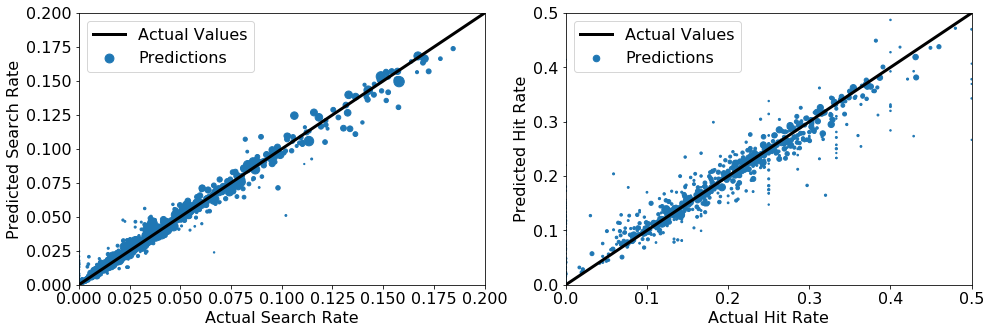

In [13]:
# setting initial parameters to the plot
plt.figure(figsize = (16, 5))
plt.rcParams.update({'font.size' : 16})

# plotting the data
plt.subplot(1,2,1)
plt.plot(np.linspace(0, .2, 30), np.linspace(0, .2, 30), label = 'Actual Values', linewidth = 3, c = 'k')
plt.scatter(all_data['search_rate'], fitsearch.predict(X), s = np.sqrt(pd.to_numeric(all_data.n_stops)) / 2, label = 'Predictions')

# making it look nicer
plt.xlabel('Actual Search Rate')
plt.ylabel('Predicted Search Rate')
plt.legend()
plt.axis([0, .2, 0, .2]);

#plotting the data
plt.subplot(1,2,2)
plt.plot(np.linspace(0, .5, 30), np.linspace(0, .5, 30), label = 'Actual Values', linewidth = 3, c = 'k')
plt.scatter(all_data['hit_rate'], fithit.predict(X), s = np.sqrt(pd.to_numeric(all_data.n_searches)), label = 'Predictions')

# making it look nicer
plt.xlabel('Actual Hit Rate')
plt.ylabel('Predicted Hit Rate')
plt.legend()
plt.axis([0, .5, 0, .5]);

Now the fundamental question, what factors influence police searching vehicles and the success of those searches.

In [15]:
search_importance=pd.DataFrame(data={'Importance':fitsearch.feature_importances_},index=X.columns).sort_values(by= ['Importance'],ascending=False)
hit_importance=pd.DataFrame(data={'Importance':fithit.feature_importances_},index=X.columns).sort_values(by= ['Importance'],ascending=False)

print('search importance:')
print(search_importance)

print('\n' + 'hit importance:')
print(hit_importance)


search importance:
            Importance
White         0.393774
age           0.243090
gender        0.167350
dis_search    0.152770
dis_hit       0.028018
Hispanic      0.008557
Black         0.006441

hit importance:
            Importance
dis_hit       0.455698
age           0.196214
Hispanic      0.128101
dis_search    0.107358
gender        0.063386
Black         0.025004
White         0.024238


We'll now visualize try to visualize the models predictions. First we need to generate X maps for search and hit rates.

In [16]:
MenS = pd.DataFrame(data = {'dis_hit' : [.2] * 60 * 60, 
                                 'dis_search' : [i for i in np.linspace(.015, .06, 60) for j in range(60)],
                                 'age' : [j for i in range(60) for j in range(16, 76)], 'gender' : [1] * 60 * 60,
                                 'White' : [0] * 60 * 60, 'Black':[0] * 60 * 60, 'Hispanic' : [0] * 60 * 60})[X.columns]

WhiteMenS = MenS.copy()
WhiteMenS['White'] = 1

BlackMenS = MenS.copy()
BlackMenS['Black'] = 1

HispanicMenS = MenS.copy()
HispanicMenS['Hispanic'] = 1

WomenS = MenS.copy()
WomenS['gender'] = 0

WhiteWomenS = WomenS.copy()
WhiteWomenS['White'] = 1

BlackWomenS = WomenS.copy()
BlackWomenS['Black'] = 1

HispanicWomenS = WomenS.copy()
HispanicWomenS['Hispanic'] = 1

Plot search rate data for men

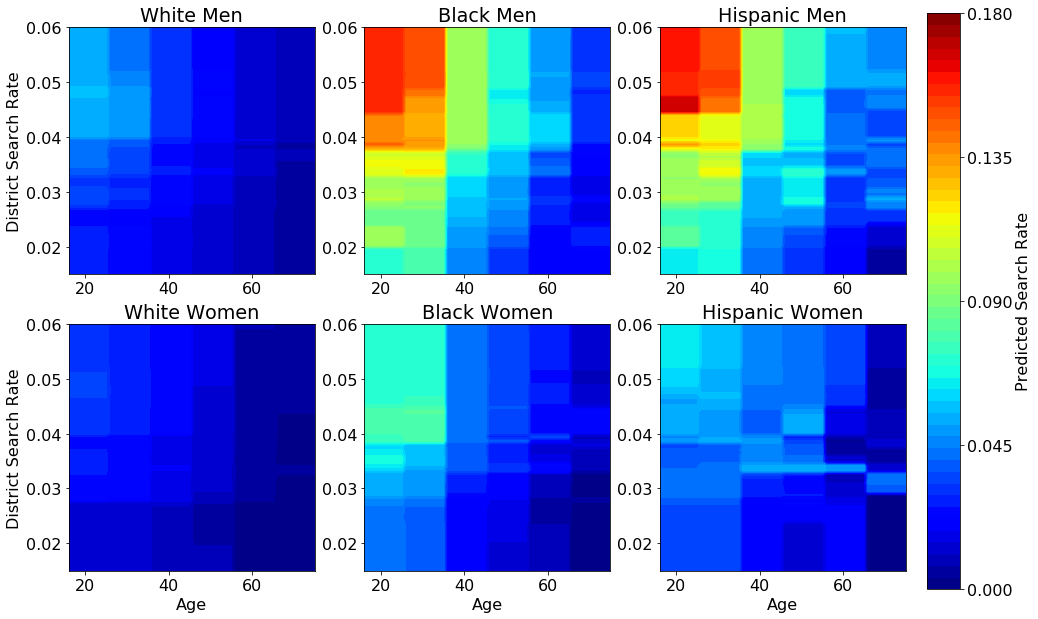

In [17]:
#initializing figures
fig = plt.figure(figsize = (15, 10))
plt.rcParams.update({'font.size' : 16})

# plotting White men
plt.subplot(2, 3, 1)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(WhiteMenS), [60, 60]),
             np.linspace(0, .18, 50), cmap = 'jet')
plt.ylabel('District Search Rate')
#plt.xlabel('Age')
plt.title('White Men')

# plotting Black Men
plt.subplot(2, 3, 2)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(BlackMenS), [60, 60]),
             np.linspace(0, .18, 50), cmap = 'jet')
#plt.xlabel('Age')
plt.title('Black Men')

# plotting Hispanic Men
plt.subplot(2, 3, 3)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(HispanicMenS), [60, 60]),
             np.linspace(0, .18, 50), cmap = 'jet')
#plt.xlabel('Age')
plt.title('Hispanic Men')



# plotting White women
plt.subplot(2, 3, 4)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(WhiteWomenS), [60, 60]),
             np.linspace(0, .18, 50),cmap = 'jet')
plt.ylabel('District Search Rate')
plt.xlabel('Age')
plt.title('White Women')

# plotting Black women
plt.subplot(2, 3, 5)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(BlackWomenS), [60, 60]),
             np.linspace(0, .18, 50),cmap = 'jet')
plt.xlabel('Age')
plt.title('Black Women')

# plotting Hispanic women
plt.subplot(2, 3, 6)
plt.contourf(range(16, 76), np.linspace(.015, .06, 60), np.reshape(fitsearch.predict(HispanicWomenS), [60, 60]),
             np.linspace(0, .18, 50), cmap = 'jet')
plt.xlabel('Age')
plt.title('Hispanic Women')


# adding a color bar
cbaxes = fig.add_axes([.92, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(cax = cbaxes, ticks = np.linspace(0,.18,5))
cbaxes.set_ylabel('Predicted Search Rate');

Now for hit rate

In [18]:
MenH = pd.DataFrame(data = {'dis_hit' : [i for i in np.linspace(.1,.45,60) for j in range(60)], 
                                 'dis_search' : [.035] * 60 * 60,
                                 'age' : [j for i in range(60) for j in range(16, 76)], 'gender' : [1] * 60 * 60,
                                 'White' : [0] * 60 * 60, 'Black':[0] * 60 * 60, 'Hispanic' : [0] * 60 * 60})[X.columns]

WhiteMenH = MenH.copy()
WhiteMenH['White'] = 1

BlackMenH = MenH.copy()
BlackMenH['Black'] = 1

HispanicMenH = MenH.copy()
HispanicMenH['Hispanic'] = 1

WomenH = MenH.copy()
WomenH['gender'] = 0

WhiteWomenH = WomenH.copy()
WhiteWomenH['White'] = 1

BlackWomenH = WomenH.copy()
BlackWomenH['Black'] = 1

HispanicWomenH = WomenH.copy()
HispanicWomenH['Hispanic'] = 1

Plot hit rate

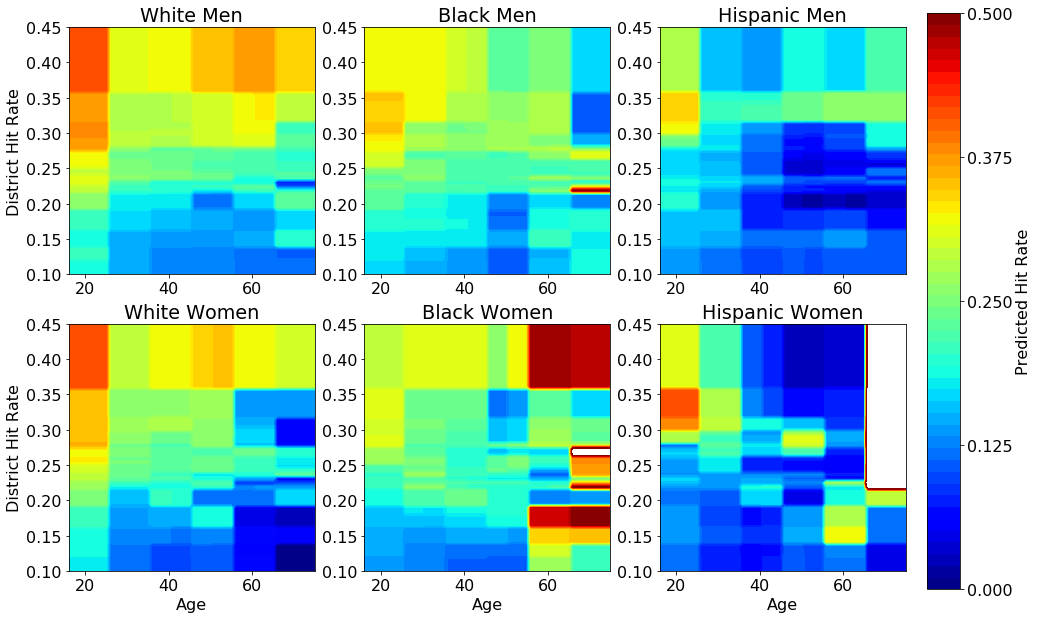

In [19]:
# intializing plot
fig = plt.figure(figsize = (15, 10))
plt.rcParams.update({'font.size': 16})

# plotting White men
plt.subplot(2, 3, 1)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(WhiteMenH), [60, 60]), 
             np.linspace(0, .5, 50), cmap = 'jet')
plt.ylabel('District Hit Rate')
plt.title('White Men')

# plotting Black men
plt.subplot(2, 3, 2)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(BlackMenH), [60, 60]),
             np.linspace(0, .5, 50), cmap = 'jet')
plt.title('Black Men')

# plotting Hispanic men
plt.subplot(2, 3, 3)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(HispanicMenH), [60, 60]),
             np.linspace(0, .5, 50), cmap = 'jet')
plt.title('Hispanic Men')

# plotting White women
plt.subplot(2, 3, 4)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(WhiteWomenH), [60, 60]),
             np.linspace(0, .5, 50), cmap = 'jet')
plt.ylabel('District Hit Rate')
plt.xlabel('Age')
plt.title('White Women')

# plotting Black women
plt.subplot(2, 3, 5)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(BlackWomenH), [60, 60]),
             np.linspace(0, .5, 50), cmap = 'jet')
plt.xlabel('Age')
plt.title('Black Women')

# plotting Hispanic women
plt.subplot(2, 3, 6)
plt.contourf(range(16, 76), np.linspace(.1, .45, 60), np.reshape(fithit.predict(HispanicWomenH), [60, 60]),
             np.linspace(0, .5, 50), cmap = 'jet')
plt.xlabel('Age')
plt.title('Hispanic Women')

# adding a colorbar
cbaxes = fig.add_axes([.92, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(cax = cbaxes, ticks = np.linspace(0, .5, 5))
cbaxes.set_ylabel('Predicted Hit Rate');

In [20]:
from sklearn.linear_model import LinearRegression

fitsearchlinear= LinearRegression()
fithitlinear = LinearRegression()

fitsearchlinear.fit(X, all_data['search_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))
fithitlinear.fit(X, all_data['hit_rate'], sample_weight = np.array(np.sqrt(all_data['n_searches'])))

print('Accuracy of search rate : ' + str(fitsearchlinear.score(X, all_data['search_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))))
print('Accuracy of hit rate : ' + str(fithitlinear.score(X, all_data['hit_rate'], sample_weight = np.array(np.sqrt(all_data['n_stops'])))))

Accuracy of search rate : 0.74341222444
Accuracy of hit rate : 0.532494225576


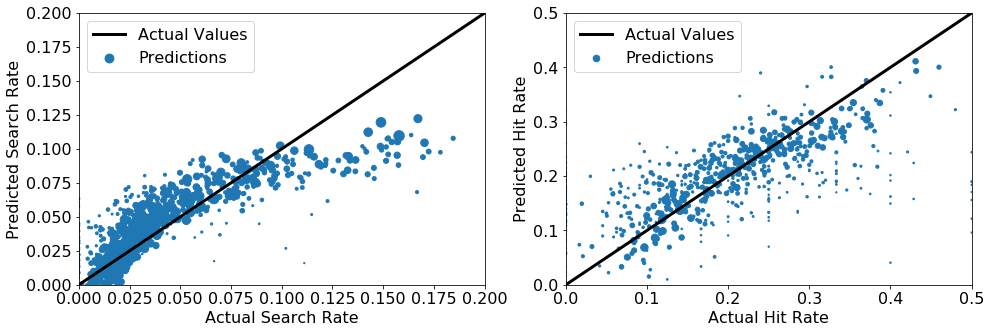

In [21]:
# setting initial parameters to the plot
plt.figure(figsize = (16, 5))
plt.rcParams.update({'font.size' : 16})

# plotting the data
plt.subplot(1,2,1)
plt.plot(np.linspace(0, .2, 30), np.linspace(0, .2, 30), label = 'Actual Values', linewidth = 3, c = 'k')
plt.scatter(all_data['search_rate'], fitsearchlinear.predict(X), s = np.sqrt(pd.to_numeric(all_data.n_stops)) / 2, label = 'Predictions')

# making it look nicer
plt.xlabel('Actual Search Rate')
plt.ylabel('Predicted Search Rate')
plt.legend()
plt.axis([0, .2, 0, .2]);

#plotting the data
plt.subplot(1,2,2)
plt.plot(np.linspace(0, .5, 30), np.linspace(0, .5, 30), label = 'Actual Values', linewidth = 3, c = 'k')
plt.scatter(all_data['hit_rate'], fithitlinear.predict(X), s = np.sqrt(pd.to_numeric(all_data.n_searches)), label = 'Predictions')

# making it look nicer
plt.xlabel('Actual Hit Rate')
plt.ylabel('Predicted Hit Rate')
plt.legend()
plt.axis([0, .5, 0, .5]);